<a href="https://colab.research.google.com/github/dhyaks/Assigment/blob/main/M20AIE210.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from sklearn.preprocessing import LabelEncoder
label_encoder=LabelEncoder()
import zipfile



In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
import zipfile

In [4]:
zip_ref = zipfile.ZipFile('/content/drive/MyDrive/BIO_VISION/predict-20221101T092253Z-001.zip', 'r')
zip_ref.extractall('/content/drive/MyDrive/BIO_VISION')
zip_ref.close()
zip_ref = zipfile.ZipFile('/content/drive/MyDrive/BIO_VISION/train-20221101T092401Z-001.zip', 'r')
zip_ref.extractall('/content/drive/MyDrive/BIO_VISION')
zip_ref.close()
zip_ref = zipfile.ZipFile('/content/drive/MyDrive/BIO_VISION/test-20221101T092219Z-001.zip', 'r')
zip_ref.extractall('/content/drive/MyDrive/BIO_VISION')
zip_ref.close()

In [ ]:
################Image_counts_and_load_in_dataFrame######

In [5]:
import glob
import pandas as pd
import os

In [6]:
def data_image_data_create(f):
  image_file=f+'/'+'*'
  path,file=os.path.split(f)
  l1=[]
  count=0
  for ii in glob.glob(image_file):
    l1.append(ii)
    count=count+1
  data=pd.DataFrame({'filename':l1})
  data['Category']=str(file)
  data['Category']=data['Category'].str.lower()
  print('**Folder Name=',file,"**" 'Image Count=',count)
  del l1
  return data

def data_extract(path):
  f_data=pd.DataFrame()
  p=path+'/'+'*'
  for i in glob.glob(p):
    d=data_image_data_create(i)
    f_data=f_data.append(d)
  return f_data

In [7]:
train_data=data_extract('/content/drive/MyDrive/BIO_VISION/train')

**Folder Name= pinenapple **Image Count= 230
**Folder Name= kiwi **Image Count= 230
**Folder Name= mango **Image Count= 231
**Folder Name= cherry **Image Count= 230
**Folder Name= orange **Image Count= 230
**Folder Name= watermelon **Image Count= 230
**Folder Name= Apple **Image Count= 230
**Folder Name= Banana **Image Count= 230
**Folder Name= avocado **Image Count= 230
**Folder Name= strawberries **Image Count= 230


In [8]:
test_data=data_extract('/content/drive/MyDrive/BIO_VISION/test')

**Folder Name= apple **Image Count= 89
**Folder Name= watermelon **Image Count= 105
**Folder Name= banana **Image Count= 106
**Folder Name= cherry **Image Count= 105
**Folder Name= pinenapple **Image Count= 105
**Folder Name= orange **Image Count= 97
**Folder Name= mango **Image Count= 105
**Folder Name= avocado **Image Count= 105
**Folder Name= stawberries **Image Count= 103
**Folder Name= kiwi **Image Count= 105


In [9]:
###############decode your Category###########

In [10]:
train_data['Category'].value_counts()

mango           231
pinenapple      230
kiwi            230
cherry          230
orange          230
watermelon      230
apple           230
banana          230
avocado         230
strawberries    230
Name: Category, dtype: int64

In [11]:
train_data['Category_Label']=label_encoder.fit_transform(train_data['Category'])
d1=train_data[['Category','Category_Label']].drop_duplicates()

In [12]:
d1

Category  Category_Label
0    pinenapple               7
0          kiwi               4
0         mango               5
0        cherry               3
0        orange               6
0    watermelon               9
0         apple               0
0        banana               2
0       avocado               1
0  strawberries               8

In [13]:
test_data['Category'].value_counts()

banana         106
watermelon     105
cherry         105
pinenapple     105
mango          105
avocado        105
kiwi           105
stawberries    103
orange          97
apple           89
Name: Category, dtype: int64

In [14]:
test_data['Category_Label']=label_encoder.fit_transform(test_data['Category'])
d2=test_data[['Category','Category_Label']].drop_duplicates()

In [15]:
d2

Category  Category_Label
0        apple               0
0   watermelon               9
0       banana               2
0       cherry               3
0   pinenapple               7
0       orange               6
0        mango               5
0      avocado               1
0  stawberries               8
0         kiwi               4

In [16]:
###########Image Size##############

In [17]:
import cv2

In [18]:
def image_shape(f):
  im=cv2.imread(f)
  size=im.shape
  return size

In [19]:
def image_size_count(data):
  size_data=[]
  for i in data['filename']:
    im=cv2.imread(i)
    try:
      x=im.shape 
      size_data.append(x)
    except:
      print(i)
  df=pd.DataFrame({'Size':size_data})
  return df

In [20]:
train_size=image_size_count(train_data)

/content/drive/MyDrive/BIO_VISION/train/orange/img_2731.jpeg


In [21]:
train_size['Size'].value_counts()

(183, 275, 3)    416
(225, 225, 3)    326
(194, 259, 3)    205
(168, 300, 3)    156
(275, 183, 3)    108
                ... 
(172, 292, 3)      1
(169, 298, 3)      1
(137, 366, 3)      1
(161, 313, 3)      1
(153, 330, 3)      1
Name: Size, Length: 261, dtype: int64

In [22]:
test_size=image_size_count(test_data)

In [23]:
test_size['Size'].value_counts()

(225, 225, 3)    199
(183, 275, 3)    157
(194, 259, 3)     95
(275, 183, 3)     69
(168, 300, 3)     61
                ... 
(262, 193, 3)      1
(282, 179, 3)      1
(290, 173, 3)      1
(227, 222, 3)      1
(186, 271, 3)      1
Name: Size, Length: 181, dtype: int64

In [24]:
##################Resize_Image######

In [25]:
train_data

filename      Category  \
0    /content/drive/MyDrive/BIO_VISION/train/pinena...    pinenapple   
1    /content/drive/MyDrive/BIO_VISION/train/pinena...    pinenapple   
2    /content/drive/MyDrive/BIO_VISION/train/pinena...    pinenapple   
3    /content/drive/MyDrive/BIO_VISION/train/pinena...    pinenapple   
4    /content/drive/MyDrive/BIO_VISION/train/pinena...    pinenapple   
..                                                 ...           ...   
225  /content/drive/MyDrive/BIO_VISION/train/strawb...  strawberries   
226  /content/drive/MyDrive/BIO_VISION/train/strawb...  strawberries   
227  /content/drive/MyDrive/BIO_VISION/train/strawb...  strawberries   
228  /content/drive/MyDrive/BIO_VISION/train/strawb...  strawberries   
229  /content/drive/MyDrive/BIO_VISION/train/strawb...  strawberries   

     Category_Label  
0                 7  
1                 7  
2                 7  
3                 7  
4                 7  
..              ...  
225               8  
226               8  
227               8  
228               8  
229               8  

[2301 rows x 3 columns]

In [26]:
def resize_image(data):
  for i in data['filename']:
    try:
      img=cv2.imread(i)
      print('Original Dimensions: ',img.shape)
      width=int(150)
      height=int(150)
      dim=(width,height)
      resized=cv2.resize(img,dim,interpolation=cv2.INTER_AREA)
      print('Resized Dimensions: ',resized.shape)
      cv2.imwrite(i,resized)
    except:
      print(i)

In [27]:
resize_image(train_data)

Original Dimensions:  (175, 287, 3)
Resized Dimensions:  (150, 150, 3)
Original Dimensions:  (225, 225, 3)
Resized Dimensions:  (150, 150, 3)
Original Dimensions:  (191, 264, 3)
Resized Dimensions:  (150, 150, 3)
Original Dimensions:  (179, 281, 3)
Resized Dimensions:  (150, 150, 3)
Original Dimensions:  (183, 275, 3)
Resized Dimensions:  (150, 150, 3)
Original Dimensions:  (259, 194, 3)
Resized Dimensions:  (150, 150, 3)
Original Dimensions:  (165, 306, 3)
Resized Dimensions:  (150, 150, 3)
Original Dimensions:  (177, 284, 3)
Resized Dimensions:  (150, 150, 3)
Original Dimensions:  (183, 275, 3)
Resized Dimensions:  (150, 150, 3)
Original Dimensions:  (222, 227, 3)
Resized Dimensions:  (150, 150, 3)
Original Dimensions:  (185, 273, 3)
Resized Dimensions:  (150, 150, 3)
Original Dimensions:  (177, 284, 3)
Resized Dimensions:  (150, 150, 3)
Original Dimensions:  (167, 301, 3)
Resized Dimensions:  (150, 150, 3)
Original Dimensions:  (212, 238, 3)
Resized Dimensions:  (150, 150, 3)
Origin

In [28]:
resize_image(test_data)

Original Dimensions:  (183, 275, 3)
Resized Dimensions:  (150, 150, 3)
Original Dimensions:  (199, 253, 3)
Resized Dimensions:  (150, 150, 3)
Original Dimensions:  (188, 268, 3)
Resized Dimensions:  (150, 150, 3)
Original Dimensions:  (225, 225, 3)
Resized Dimensions:  (150, 150, 3)
Original Dimensions:  (245, 206, 3)
Resized Dimensions:  (150, 150, 3)
Original Dimensions:  (245, 206, 3)
Resized Dimensions:  (150, 150, 3)
Original Dimensions:  (168, 300, 3)
Resized Dimensions:  (150, 150, 3)
Original Dimensions:  (225, 225, 3)
Resized Dimensions:  (150, 150, 3)
Original Dimensions:  (168, 300, 3)
Resized Dimensions:  (150, 150, 3)
Original Dimensions:  (157, 321, 3)
Resized Dimensions:  (150, 150, 3)
Original Dimensions:  (220, 230, 3)
Resized Dimensions:  (150, 150, 3)
Original Dimensions:  (183, 275, 3)
Resized Dimensions:  (150, 150, 3)
Original Dimensions:  (177, 284, 3)
Resized Dimensions:  (150, 150, 3)
Original Dimensions:  (179, 281, 3)
Resized Dimensions:  (150, 150, 3)
Origin

In [29]:
resize_train_size=image_size_count(train_data)

/content/drive/MyDrive/BIO_VISION/train/orange/img_2731.jpeg


In [30]:
#################Show One Image In very Folder##########

In [31]:
from PIL import Image

In [32]:
lst=train_data['Category'].unique()

In [33]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg


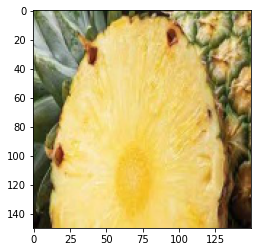

pinenapple


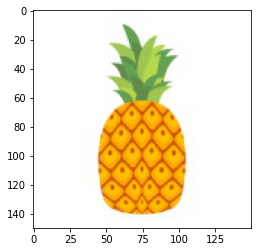

pinenapple


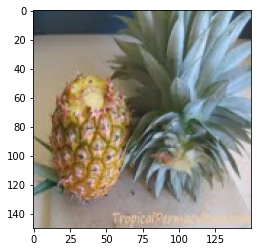

pinenapple


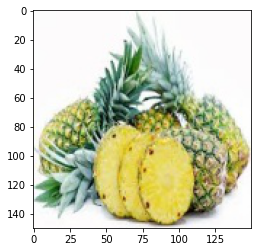

pinenapple


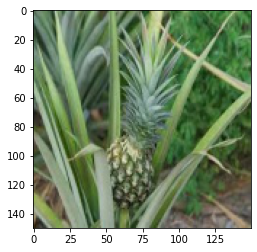

pinenapple


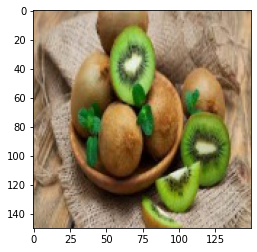

kiwi


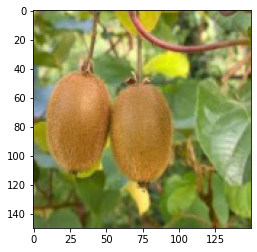

kiwi


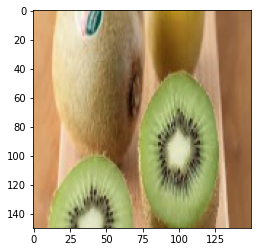

kiwi


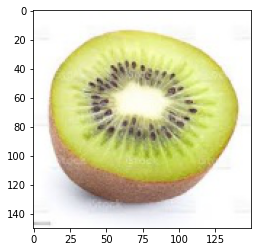

kiwi


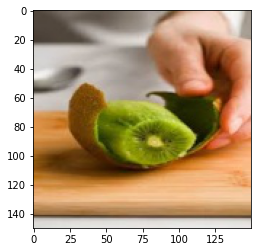

kiwi


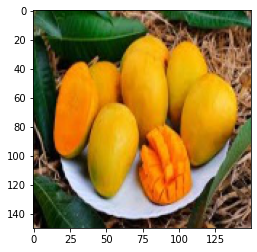

mango


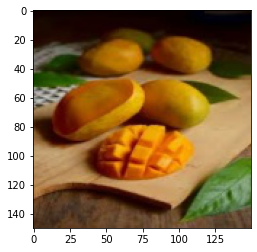

mango


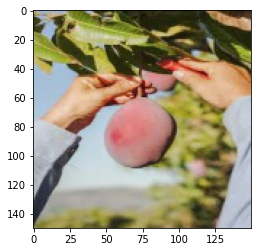

mango


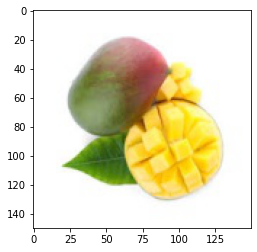

mango


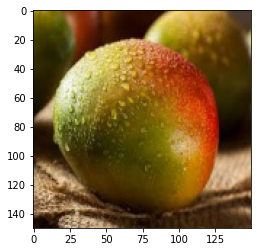

mango


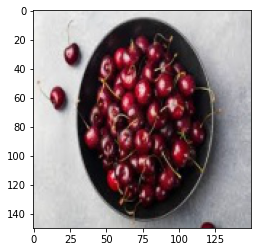

cherry


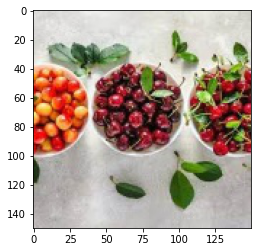

cherry


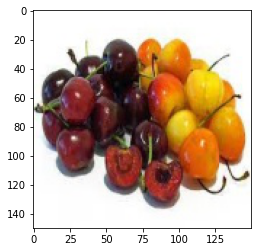

cherry


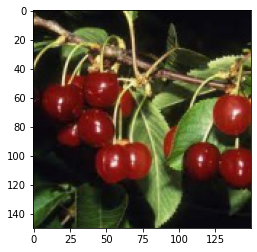

cherry


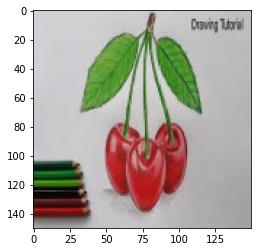

cherry


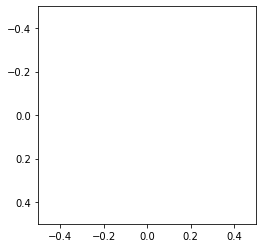

orange


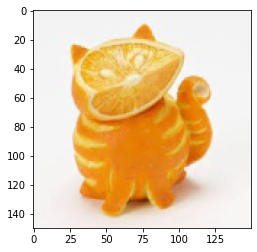

orange


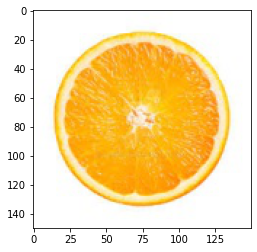

orange


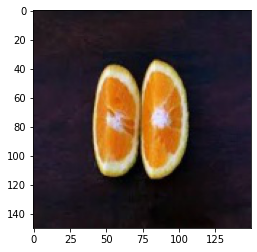

orange


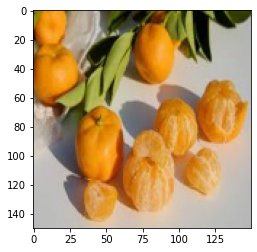

orange


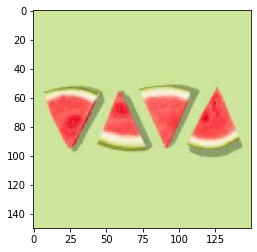

watermelon


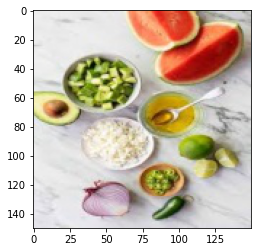

watermelon


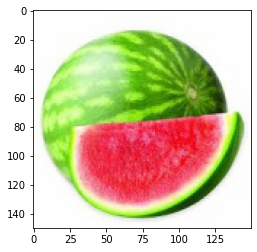

watermelon


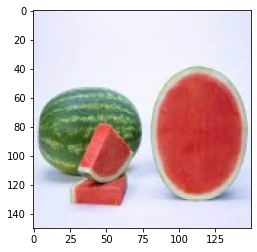

watermelon


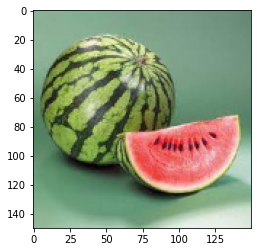

watermelon


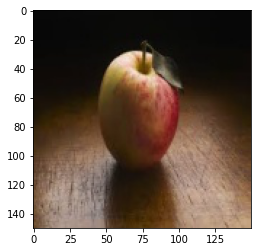

apple


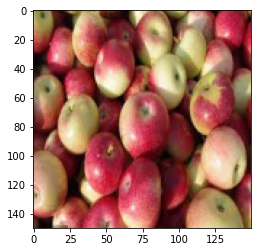

apple


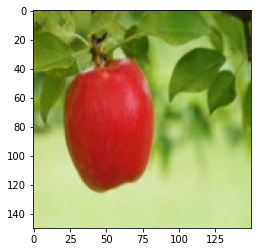

apple


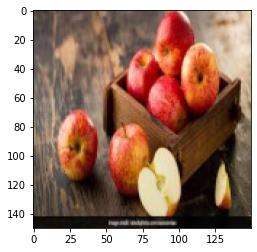

apple


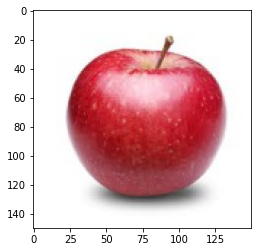

apple


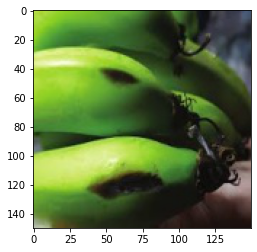

banana


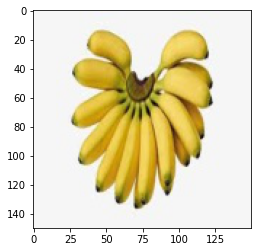

banana


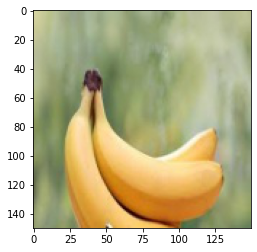

banana


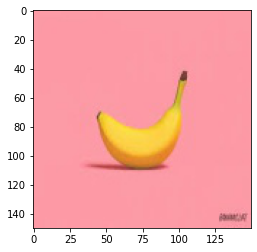

banana


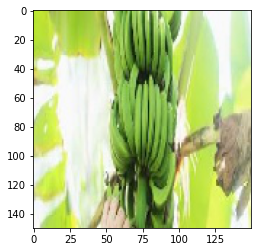

banana


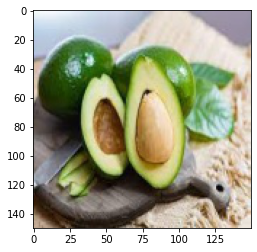

avocado


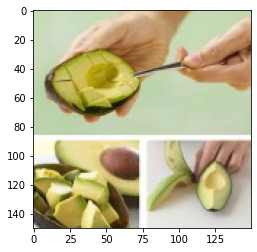

avocado


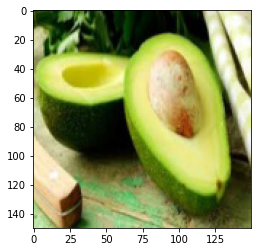

avocado


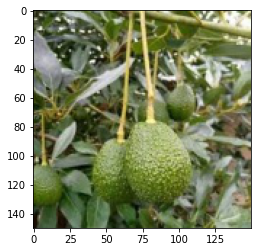

avocado


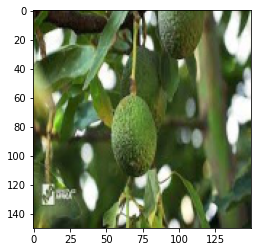

avocado


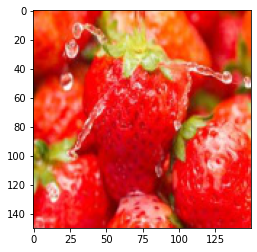

strawberries


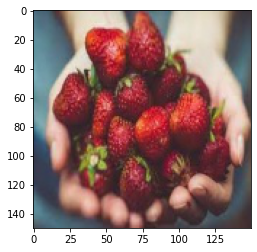

strawberries


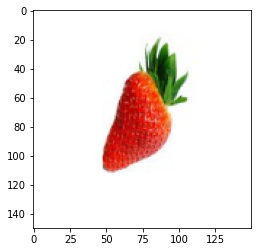

strawberries


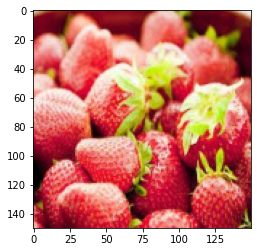

strawberries


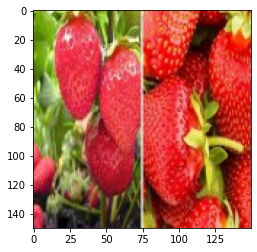

strawberries


In [34]:
for i in lst:
  res=train_data[train_data['Category']==i]
  res1=res[:5]
  x=res1['Category'][0]
  for i in res1['filename']:
    img = mpimg.imread(i)
    imgplot = plt.imshow(img)
    plt.show()
    print(x)


In [35]:
import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense,Conv2D,MaxPooling2D,Flatten,BatchNormalization,Dropout

In [36]:
train_ds = keras.utils.image_dataset_from_directory(
    directory = '/content/drive/MyDrive/BIO_VISION/train',
    labels='inferred',
    label_mode = 'int',
    batch_size=32,
    image_size=(150,150)
)

Found 2301 files belonging to 10 classes.


In [37]:
validation_ds = keras.utils.image_dataset_from_directory(
    directory = '/content/drive/MyDrive/BIO_VISION/test',
    labels='inferred',
    label_mode = 'int',
    batch_size=32,
    image_size=(150,150)
)

Found 1025 files belonging to 10 classes.


In [38]:
def process(image,label):
    image = tf.cast(image/255. ,tf.float32)
    return image,label

train_ds = train_ds.map(process)
validation_ds = validation_ds.map(process)

In [40]:
model = Sequential()

model.add(Conv2D(32,kernel_size=(3,3),padding='valid',activation='relu',input_shape=(150,150,3)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Conv2D(64,kernel_size=(3,3),padding='valid',activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Conv2D(128,kernel_size=(3,3),padding='valid',activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Flatten())

model.add(Dense(128,activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(64,activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(1,activation='softmax'))

In [41]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 148, 148, 32)      896       
                                                                 
 batch_normalization_3 (Batc  (None, 148, 148, 32)     128       
 hNormalization)                                                 
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 74, 74, 32)       0         
 2D)                                                             
                                                                 
 conv2d_4 (Conv2D)           (None, 72, 72, 64)        18496     
                                                                 
 batch_normalization_4 (Batc  (None, 72, 72, 64)       256       
 hNormalization)                                                 
                                                      

In [42]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [43]:
history = model.fit(train_ds,epochs=100,validation_data=validation_ds)

Epoch 1/100
72/72 [==============================] - 15s 83ms/step - loss: -204263.7969 - accuracy: 0.1000 - val_loss: -105517.1484 - val_accuracy: 0.1024
Epoch 2/100
72/72 [==============================] - 6s 73ms/step - loss: -4298077.5000 - accuracy: 0.1000 - val_loss: -3234321.2500 - val_accuracy: 0.1024
Epoch 3/100
72/72 [==============================] - 6s 75ms/step - loss: -26710874.0000 - accuracy: 0.1000 - val_loss: -25502784.0000 - val_accuracy: 0.1024
Epoch 4/100
72/72 [==============================] - 6s 76ms/step - loss: -98342392.0000 - accuracy: 0.1000 - val_loss: -85437632.0000 - val_accuracy: 0.1024
Epoch 5/100
72/72 [==============================] - 7s 91ms/step - loss: -261900336.0000 - accuracy: 0.1000 - val_loss: -286111712.0000 - val_accuracy: 0.1024
Epoch 6/100
72/72 [==============================] - 7s 94ms/step - loss: -579607360.0000 - accuracy: 0.1000 - val_loss: -583495808.0000 - val_accuracy: 0.1024
Epoch 7/100
72/72 [==============================] - 

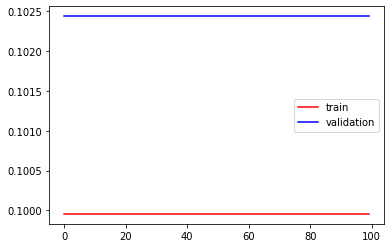

In [44]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'],color='red',label='train')
plt.plot(history.history['val_accuracy'],color='blue',label='validation')
plt.legend()
plt.show()

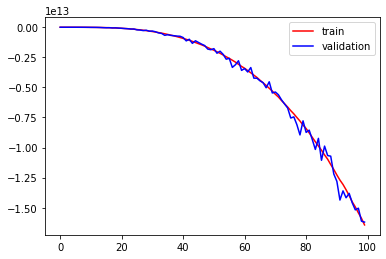

In [45]:
plt.plot(history.history['loss'],color='red',label='train')
plt.plot(history.history['val_loss'],color='blue',label='validation')
plt.legend()
plt.show()

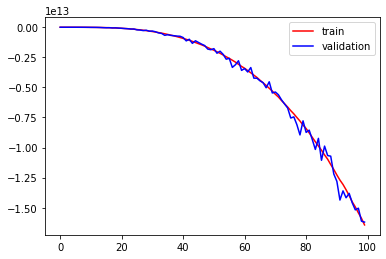

In [46]:
plt.plot(history.history['loss'],color='red',label='train')
plt.plot(history.history['val_loss'],color='blue',label='validation')
plt.legend()
plt.show()

In [ ]:
##################Predict#######################

In [47]:
f=glob.glob('/content/drive/MyDrive/BIO_VISION/predict/*')

In [48]:
l1=[]
for i in f:
  l1.append(i)
predit_data=pd.DataFrame({'filename':l1})


In [49]:
resize_image(predit_data)

Original Dimensions:  (225, 225, 3)
Resized Dimensions:  (150, 150, 3)
Original Dimensions:  (218, 231, 3)
Resized Dimensions:  (150, 150, 3)
Original Dimensions:  (194, 260, 3)
Resized Dimensions:  (150, 150, 3)
Original Dimensions:  (279, 181, 3)
Resized Dimensions:  (150, 150, 3)
Original Dimensions:  (183, 275, 3)
Resized Dimensions:  (150, 150, 3)
Original Dimensions:  (224, 224, 3)
Resized Dimensions:  (150, 150, 3)
Original Dimensions:  (172, 293, 3)
Resized Dimensions:  (150, 150, 3)
Original Dimensions:  (183, 275, 3)
Resized Dimensions:  (150, 150, 3)
Original Dimensions:  (269, 187, 3)
Resized Dimensions:  (150, 150, 3)
Original Dimensions:  (201, 251, 3)
Resized Dimensions:  (150, 150, 3)
Original Dimensions:  (194, 259, 3)
Resized Dimensions:  (150, 150, 3)
Original Dimensions:  (193, 260, 3)
Resized Dimensions:  (150, 150, 3)
Original Dimensions:  (225, 225, 3)
Resized Dimensions:  (150, 150, 3)
Original Dimensions:  (183, 275, 3)
Resized Dimensions:  (150, 150, 3)
Origin